# Total Variation of Salinity between Models
Comparison of summary statistics for the HADCM3, CSIRO, and GISS models.

Due to the large number of files for the GISS dataset, with each of the 8 experiments having 20 sections (50 years for 1000 years), the following code creates the array of file names. 

Both the array for the in /data folder and from direct url are included. While the smaller size of the GISS files makes pulling from link less timeconsuming than the HADCM3 and CSIRO models, local files are still reccomended, and the filedict dictionary is used throughout the rest of this notebook.

In [1]:
filedict = {}
for i in range (121,129):
    filedict['GISS_'+str(i)]=[]
    file_base="../data/GISS/sos_Omon_GISS-E2-R_past1000_r1i1p"
    for j in range(850,1000,50):
        filedict['GISS_'+str(i)].append(file_base + str(i) + "_0" + str(j) + "01-0" + str(j+49) + "12.nc")
    for j in range(1000,1050,50):
        filedict['GISS_'+str(i)].append(file_base + str(i) + '_' + str(j) + '01-' + str(j+50)+'12.nc')
    for j in range(1051,1851,50):
        filedict['GISS_'+str(i)].append(file_base + str(i) + '_' + str(j) + '01-' + str(j+49)+'12.nc')

In [ ]:
urldict = {}
for i in range (121,129):
    urldict['GISS_'+str(i)]=[]
    url_base1="https://ds.nccs.nasa.gov/thredds/fileServer/CMIP5/NASA/GISS/past1000/E2-R_past1000_r1i1p"
    url_base2="/sos_Omon_GISS-E2-R_past1000_r1i1p"
    for j in range(850,1000,50):
        urldict['GISS_'+str(i)].append(url_base1 + str(i) + url_base2 + str(i) + "_0" + str(j) + "01-0" + str(j+49) + "12.nc#mode=bytes")
    for j in range(1000,1050,50):
        urldict['GISS_'+str(i)].append(url_base1 + str(i) + url_base2 + str(i) + '_' + str(j) + '01-' + str(j+50)+'12.nc#mode=bytes')
    for j in range(1051,1851,50):
        urldict['GISS_'+str(i)].append(url_base1 + str(i) + url_base2 + str(i) + '_' + str(j) + '01-' + str(j+49)+'12.nc#mode=bytes')

In [2]:
keys = list(filedict.keys())
keys[0]

'GISS_121'

A quick test of the **combo** function to prove it's working correctly should provide an average of 33.27420974182677 and a standard deviation of  0.28349770550409265

In [4]:
import combo as cb
cb.avg_std(90,0,filedict[keys[0]])

(33.27420974182677, 0.28349770550409265)

Now, to read in the cores.

In [5]:
import pandas as pd
cores = pd.read_table('../data/cores.txt')
for x in range(cores.shape[0]):
    lon = cores.Long[x]
    if lon<0:
        lon = lon+360
        cores.loc[x,'Long'] = lon 
cores

,Core,Depth,Coarse Fraction,Lat,Long,Ocean
0,RC08-077 PC A,1889,20%,-36.5,177.5,Pacific
1,RC09-127 PC,1533,70%,-34.5,167.5,Pacific
2,RC09-128 PC,1234,90%,-36.5,166.5,Pacific
3,RC11-021 PC A,4021,40%,-17.5,324.5,Atlantic
4,RC12-026 PC A,1618,3-8%,6.5,278.5,Pacific
5,RC12-028 PC,1368,25%,8.5,274.5,Pacific
6,RC12-340 PC A,3012,15-25%,12.5,90.5,Indian
7,RC12-340 PC,3012,15-25%,12.5,90.5,Indian
8,RC12-341 PC,2988,30-40%,13.5,89.5,Indian
9,RC12-343 PC A,2666,10-25%,15.5,90.5,Indian


The two datasets that have the full files and do not need to be combined are examined seperately using the **ncsumstat** function. While here pulling from the data folder, these files were not uploaded to github due to their large size, and so the direct links are also provided, commented out.

However, the large size of the files means that the download links will be much slower; it is reccomended that the files be downloaded directly to improve efficiency.

In [6]:
HADCM3 = '../data/sos_Omon_HadCM3_past1000_r1i1p1_085001-185012.nc'
CSIRO = '../data/sos_Omon_CSIRO-Mk3L-1-2_past1000_r1i1p1_085101-185012.nc'
#HADCM3 = "https://esgf.ceda.ac.uk/thredds/fileServer/esg_dataroot/pmip3/output/UOED/HadCM3/past1000/mon/ocean/Omon/r1i1p1/v20130313/sos/sos_Omon_HadCM3_past1000_r1i1p1_085001-185012.nc#mode=bytes"
#CSIRO = "https://esgf.nci.org.au/thredds/fileServer/master/PMIP3/output/UNSW/CSIRO-Mk3L-1-2/past1000/mon/ocean/Omon/r1i1p1/v20170728/sos/sos_Omon_CSIRO-Mk3L-1-2_past1000_r1i1p1_085101-185012.nc#mode=bytes"

avgcores = cores
import numpy as np
avgcores['HADCM3'] = np.nan
avgcores['CSIRO'] = np.nan 

## Standard Deviations
While comparing averages, minimums, and maximums to modern sea surface salinity values is useful, the statistic of interest is determining variability in salinity at these sites, and as such, using standard deviation. 

Setting up a new array for the standard deviations with empty columns, the Standard Deviations for all sites will be run first for the HADCM3 cores using the **ncsumstat** function

In [7]:
stdcores = cores
import numpy as np
stdcores['HADCM3'] = np.nan
stdcores['CSIRO'] = np.nan 

In [8]:
import ncsumstat as ns
for x in range(stdcores.shape[0]):
    lat = stdcores.Lat[x]
    lon = stdcores.Long[x]
    stdcores.loc[x,'HADCM3'] = ns.std(lon,lat,HADCM3)
    stdcores.loc[x,'CSIRO'] = ns.std(lon,lat,CSIRO)
stdcores

,Core,Depth,Coarse Fraction,Lat,Long,Ocean,HADCM3,CSIRO
0,RC08-077 PC A,1889,20%,-36.5,177.5,Pacific,0.104765,0.071006
1,RC09-127 PC,1533,70%,-34.5,167.5,Pacific,0.131031,0.100644
2,RC09-128 PC,1234,90%,-36.5,166.5,Pacific,0.100933,0.075822
3,RC11-021 PC A,4021,40%,-17.5,324.5,Atlantic,0.223172,0.212207
4,RC12-026 PC A,1618,3-8%,6.5,278.5,Pacific,0.488302,NaN
5,RC12-028 PC,1368,25%,8.5,274.5,Pacific,0.678081,0.190636
6,RC12-340 PC A,3012,15-25%,12.5,90.5,Indian,0.937768,0.386448
7,RC12-340 PC,3012,15-25%,12.5,90.5,Indian,0.937768,0.386448
8,RC12-341 PC,2988,30-40%,13.5,89.5,Indian,0.937768,0.346124
9,RC12-343 PC A,2666,10-25%,15.5,90.5,Indian,1.020912,0.324543


Then, using the **combo** function, the standard deviations are found for each of the 8 GISS datasets.

In [9]:
for k in keys:
    cores[k] = np.nan 
    for x in range(stdcores.shape[0]):
        lat = stdcores.Lat[x]
        lon = stdcores.Long[x]
        cores.loc[x,k] = cb.avg_std(lon,lat,filedict[k])[1]
    print(k)
stdcores

GISS_121
GISS_122
GISS_123
GISS_124
GISS_125
GISS_126
GISS_127
GISS_128


,Core,Depth,Coarse Fraction,Lat,Long,Ocean,HADCM3,CSIRO,GISS_121,GISS_122,GISS_123,GISS_124,GISS_125,GISS_126,GISS_127,GISS_128
0,RC08-077 PC A,1889,20%,-36.5,177.5,Pacific,0.104765,0.071006,0.247440,0.255142,0.249322,0.240322,0.248296,0.244041,0.248266,0.252199
1,RC09-127 PC,1533,70%,-34.5,167.5,Pacific,0.131031,0.100644,0.166825,0.182902,0.173695,0.166428,0.173369,0.167886,0.173551,0.175831
2,RC09-128 PC,1234,90%,-36.5,166.5,Pacific,0.100933,0.075822,0.119282,0.131560,0.121315,0.120067,0.127048,0.119458,0.124379,0.128607
3,RC11-021 PC A,4021,40%,-17.5,324.5,Atlantic,0.223172,0.212207,0.169505,0.198270,0.171141,0.170232,0.187815,0.170109,0.168973,0.190710
4,RC12-026 PC A,1618,3-8%,6.5,278.5,Pacific,0.488302,NaN,0.252842,0.269615,0.248975,0.259139,0.274642,0.244247,0.257539,0.275659
5,RC12-028 PC,1368,25%,8.5,274.5,Pacific,0.678081,0.190636,0.258116,0.264167,0.256518,0.258210,0.266477,0.254668,0.261438,0.269570
6,RC12-340 PC A,3012,15-25%,12.5,90.5,Indian,0.937768,0.386448,0.514871,0.529198,0.513322,0.517129,0.507619,0.519421,0.510643,0.515949
7,RC12-340 PC,3012,15-25%,12.5,90.5,Indian,0.937768,0.386448,0.514871,0.529198,0.513322,0.517129,0.507619,0.519421,0.510643,0.515949
8,RC12-341 PC,2988,30-40%,13.5,89.5,Indian,0.937768,0.346124,0.316550,0.332655,0.314479,0.311368,0.315609,0.320835,0.315023,0.321425
9,RC12-343 PC A,2666,10-25%,15.5,90.5,Indian,1.020912,0.324543,0.623293,0.631086,0.625562,0.620149,0.623004,0.623097,0.626105,0.626743


The resulting file is then exported so as to be saved for later analysis.

In [123]:
stdcores.to_csv('../data/cores_stdsss.csv', index=False)

### Data Analysis of Variation

In [39]:
stdcores.describe()

,Depth,Lat,Long,HADCM3,CSIRO,GISS_121,GISS_122,GISS_123,GISS_124,GISS_125,GISS_126,GISS_127,GISS_128
count,58.000000,58.000000,58.000000,57.000000,55.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2256.896552,2.310345,190.689655,0.623733,0.273869,0.295737,0.307966,0.294497,0.296226,0.303100,0.293851,0.294942,0.306634
std,1046.250611,14.901380,113.571441,0.366944,0.133254,0.148019,0.146016,0.147798,0.147003,0.138513,0.149092,0.142786,0.143750
min,416.000000,-39.500000,3.500000,0.088173,0.071006,0.105260,0.112007,0.103313,0.105304,0.112172,0.103761,0.107085,0.109598
25%,1463.500000,-1.250000,88.500000,0.291166,0.185071,0.188634,0.202831,0.185856,0.191261,0.205145,0.185747,0.188979,0.203395
50%,1944.500000,5.500000,214.000000,0.650979,0.254242,0.248410,0.256074,0.247644,0.247292,0.259151,0.244247,0.250595,0.259973
75%,3012.000000,11.250000,278.500000,0.811216,0.368223,0.338522,0.342903,0.337941,0.339466,0.351087,0.333793,0.338320,0.347525
max,4153.000000,28.500000,349.500000,1.520619,0.629044,0.634129,0.651635,0.630442,0.632618,0.635655,0.631537,0.626105,0.654241


As can be seen, the models all show average standard deviations of 0.3 with the exception of the higher 0.6 of HADCM3. The maximum standard deviations are 0.6, with HADCM3 again higher with 1.5.

In [42]:
stdcores.corr(numeric_only=1)

,Depth,Lat,Long,HADCM3,CSIRO,GISS_121,GISS_122,GISS_123,GISS_124,GISS_125,GISS_126,GISS_127,GISS_128
Depth,1.000000,0.275295,-0.115126,-0.095742,-0.053101,0.022243,0.011952,0.024081,0.018370,0.017543,0.026814,0.027153,0.006018
Lat,0.275295,1.000000,-0.015155,0.130626,0.276042,0.168134,0.166028,0.157537,0.170372,0.182554,0.167723,0.173663,0.171536
Long,-0.115126,-0.015155,1.000000,-0.338689,-0.297568,-0.399328,-0.397638,-0.402553,-0.396494,-0.378076,-0.406770,-0.389061,-0.390756
HADCM3,-0.095742,0.130626,-0.338689,1.000000,0.467203,0.390926,0.404678,0.389891,0.390632,0.387192,0.393129,0.386772,0.401866
CSIRO,-0.053101,0.276042,-0.297568,0.467203,1.000000,0.631337,0.653082,0.629173,0.636881,0.645986,0.629387,0.632093,0.647727
GISS_121,0.022243,0.168134,-0.399328,0.390926,0.631337,1.000000,0.997641,0.999731,0.999723,0.997207,0.999638,0.999065,0.998054
GISS_122,0.011952,0.166028,-0.397638,0.404678,0.653082,0.997641,1.000000,0.997748,0.997889,0.998090,0.997951,0.996634,0.999375
GISS_123,0.024081,0.157537,-0.402553,0.389891,0.629173,0.999731,0.997748,1.000000,0.999469,0.997259,0.999560,0.998958,0.997937
GISS_124,0.018370,0.170372,-0.396494,0.390632,0.636881,0.999723,0.997889,0.999469,1.000000,0.997757,0.999256,0.998996,0.998401
GISS_125,0.017543,0.182554,-0.378076,0.387192,0.645986,0.997207,0.998090,0.997259,0.997757,1.000000,0.996751,0.998028,0.998751


The correlation between the GISS models is very high, all >0.99, which shows that there isn't much shift in the initial parameters impacting these sites. HADCM3 nad CSIRO are not well correlated with each other or the GISS models, but CSIRO is better correlated with GISS than HADCM3.

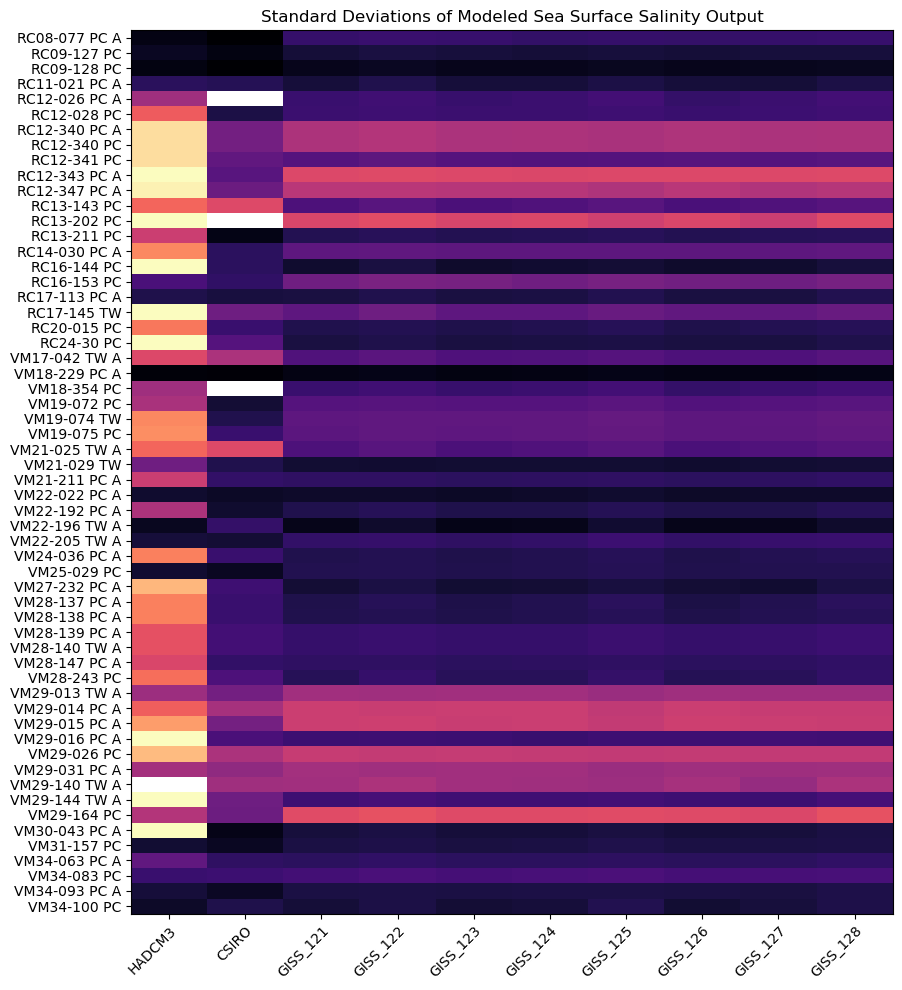

In [134]:
import matplotlib.pyplot as plt

heatmapdata = stdcores.iloc[:,6:]

fig, ax = plt.subplots()
im = ax.imshow(heatmapdata,cmap=plt.cm.magma,vmax=1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_aspect(1/5)

cmap=plt.cm.magma


ax.set_xticks(np.arange(len(heatmapdata.columns)), labels=heatmapdata.columns)
ax.set_yticks(np.arange(len(stdcores['Core'])), labels=stdcores['Core'])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Standard Deviations of Modeled Sea Surface Salinity Output")
fig.tight_layout()
plt.show()

Most evident is the consistency between the GISS models, which have only slight variations. 

There is some line up in the more variable sites between the GISS and CSIRO models (evident in VM29 and RC12 cores) but multiple high standard deviations from CSIRO do not line up with GISS. 

HADCM3 does not correlate strongly with the GISS or CSIRO, but interestingly lines up closely in several locations, namely the RC09, RC17-113, VM22-022, and VM34 cores, all of which have lower deviations. 

. 

Finally, the high standard deviation core names are exported.

In [37]:
column = list(stdcores.head())
del column[:6]
coldict = {}
for c in column:
    coldict[c]=[]
    for x in range(cores.shape[0]):
        if cores.loc[x,c] >1:
            coldict[c].append(cores.loc[x,'Core'])
coldict

{'HADCM3': ['RC12-343 PC A',
  'RC13-202 PC',
  'RC16-144 PC',
  'RC17-145 TW',
  'RC24-30 PC',
  'VM29-016 PC A',
  'VM29-144 TW A',
  'VM30-043 PC A'],
 'CSIRO': [],
 'GISS_121': [],
 'GISS_122': [],
 'GISS_123': [],
 'GISS_124': [],
 'GISS_125': [],
 'GISS_126': [],
 'GISS_127': [],
 'GISS_128': []}

In [41]:
column = list(stdcores.head())
del column[:6]
coldict = {}
for c in column:
    coldict[c]=[]
    for x in range(cores.shape[0]):
        if cores.loc[x,c] >0.5:
            coldict[c].append(cores.loc[x,'Core'])
coldict

{'HADCM3': ['RC12-028 PC',
  'RC12-340 PC A',
  'RC12-340 PC',
  'RC12-341 PC',
  'RC12-343 PC A',
  'RC12-347 PC A',
  'RC13-143 PC',
  'RC13-202 PC',
  'RC13-211 PC',
  'RC14-030 PC A',
  'RC16-144 PC',
  'RC17-145 TW',
  'RC20-015 PC',
  'RC24-30 PC',
  'VM17-042 TW A',
  'VM19-072 PC',
  'VM19-074 TW',
  'VM19-075 PC',
  'VM21-025 TW A',
  'VM21-211 PC A',
  'VM22-192 PC A',
  'VM24-036 PC A',
  'VM27-232 PC A',
  'VM28-137 PC A',
  'VM28-138 PC A',
  'VM28-139 PC A',
  'VM28-140 TW A',
  'VM28-147 PC A',
  'VM28-243 PC',
  'VM29-014 PC A',
  'VM29-015 PC A',
  'VM29-016 PC A',
  'VM29-026 PC',
  'VM29-144 TW A',
  'VM29-164 PC',
  'VM30-043 PC A'],
 'CSIRO': ['RC13-143 PC',
  'VM17-042 TW A',
  'VM21-025 TW A',
  'VM29-014 PC A',
  'VM29-026 PC'],
 'GISS_121': ['RC12-340 PC A',
  'RC12-340 PC',
  'RC12-343 PC A',
  'RC12-347 PC A',
  'RC13-202 PC',
  'VM29-014 PC A',
  'VM29-015 PC A',
  'VM29-026 PC',
  'VM29-164 PC'],
 'GISS_122': ['RC12-340 PC A',
  'RC12-340 PC',
  'RC12-343 P